In [2]:
from PIL import Image
import pytesseract
from pytesseract import image_to_string

In [3]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Users/Tingchun.TC.Hung/AppData/Local/Programs/Tesseract-OCR/tesseract.exe'#-ocr-w64-setup-v4.1.0.20190314

target_path = 'D:/Record/Computer_Science/chepai/'
target = 'chepai' #LAVA 純文字

img = Image.open(target_path+target+'.jpg')

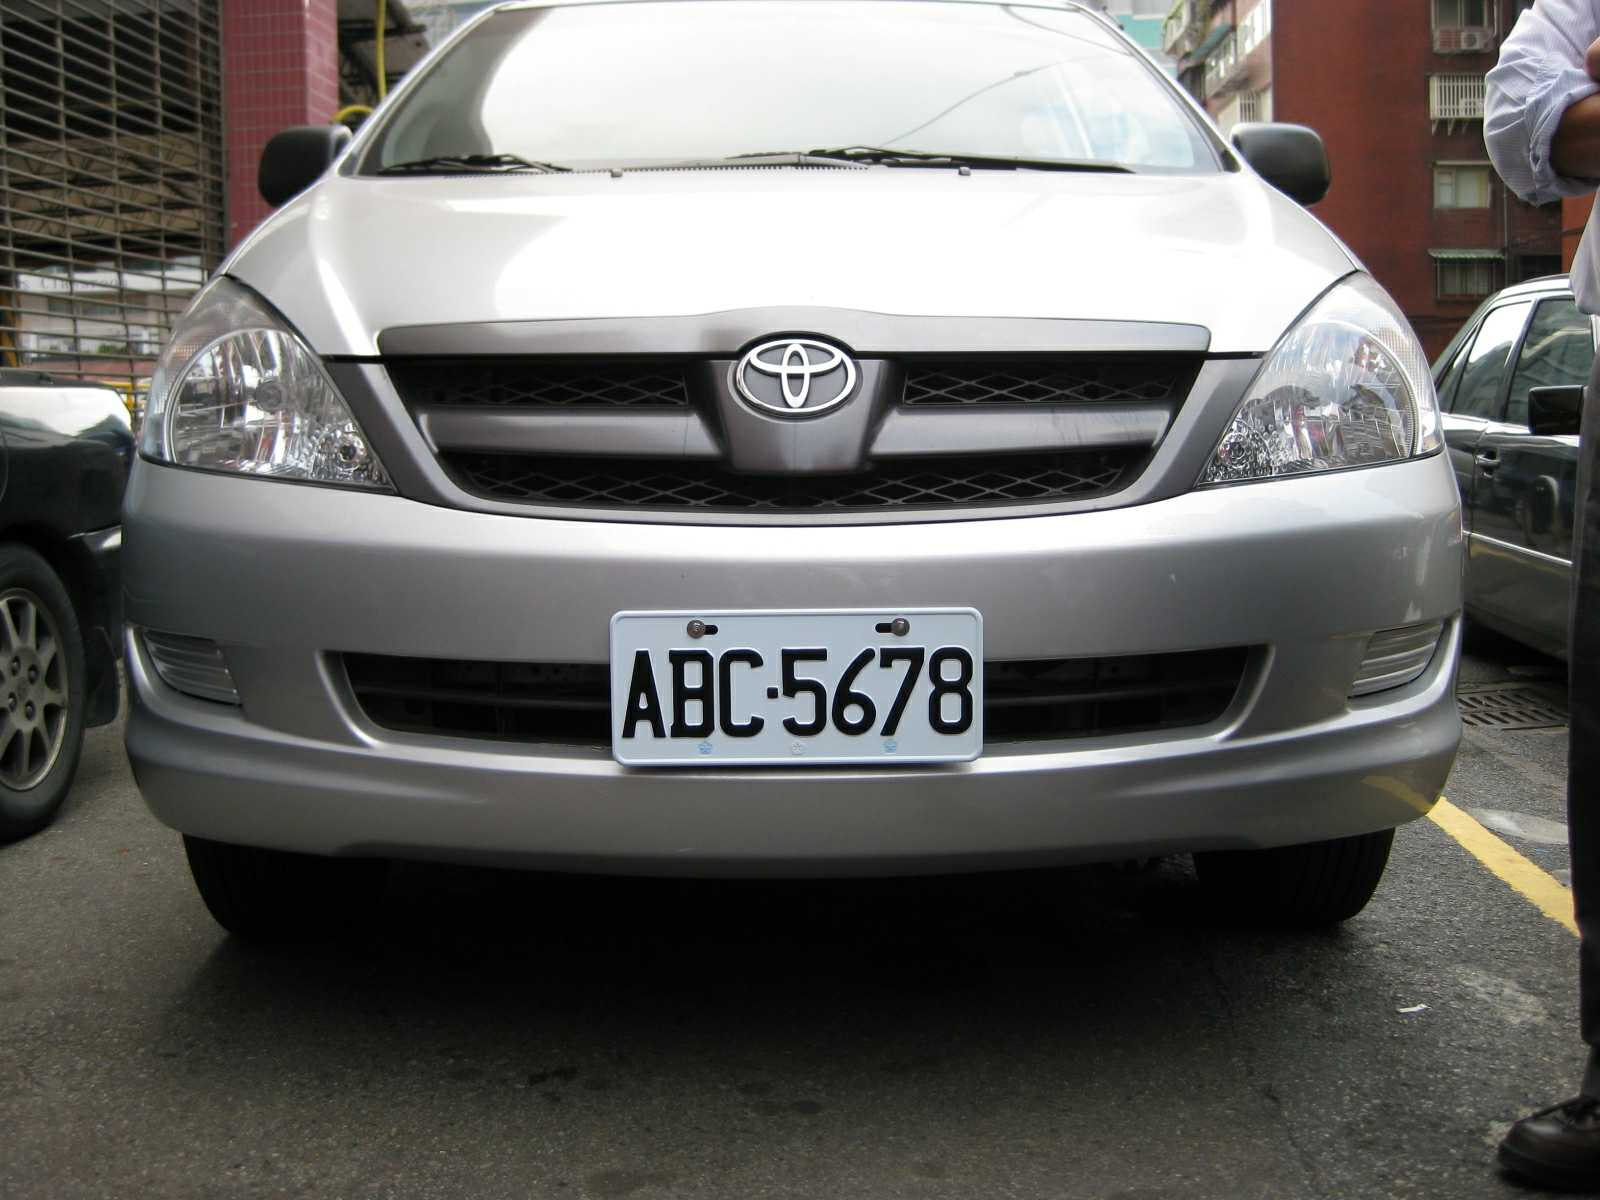

In [4]:
img

https://iter01.com/534362.html

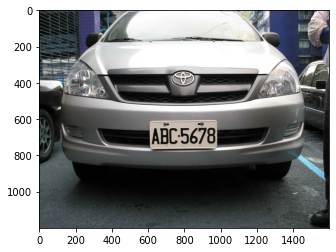

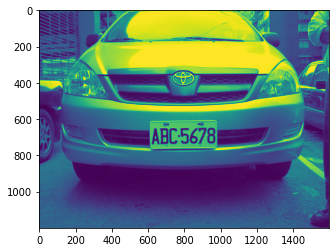

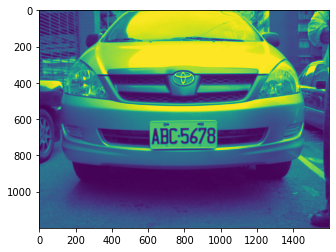

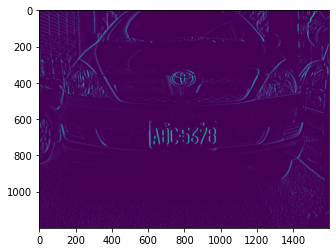

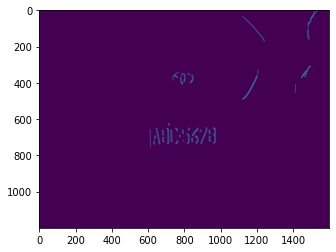

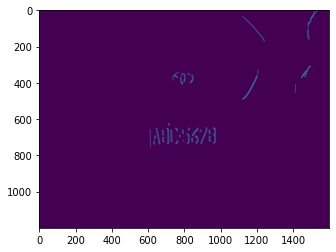

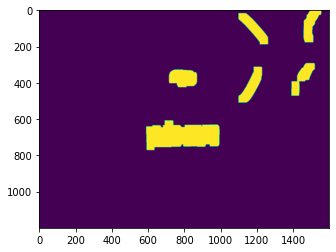

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt

# 讀取彩色的圖片
img = cv.imread('D:/Record/Computer_Science/chepai/chepai.jpg')
plt.imshow(img)
plt.show()
# 轉換為灰度圖
img1 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img1)
plt.show()
# 用Sobel進行邊緣檢測
# # 高斯模糊
img2 = cv.GaussianBlur(img1,(5,5),10)
plt.imshow(img2)
plt.show()
# Laplacian進行邊緣檢測
img3 = cv.Sobel(img2,cv.CV_8U,1,0,ksize=1)
plt.imshow(img3)
plt.show()
img4 = cv.Canny(img3,250,100)
plt.imshow(img4)
plt.show()
# 進行二值化處理
i,img5 = cv.threshold(img4,0,255,cv.THRESH_BINARY)
plt.imshow(img5)
plt.show()
# 可以侵蝕和擴張
kernel = cv.getStructuringElement(cv.MORPH_RECT,(43,33))
img6 = cv.dilate(img5,kernel)
plt.imshow(img6)
plt.show()
# # 迴圈找到所有的輪廓
i,j = cv.findContours(img6,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
result = None
# for i1 in i:
#     x,y,w,h = cv.boundingRect(i1)
#     if w>2*h:
#         print(1)
#         plt.imshow(img[y:y+h,x:x+w])
#         plt.show()
#         result = img[y:y+h,x:x+w]

1


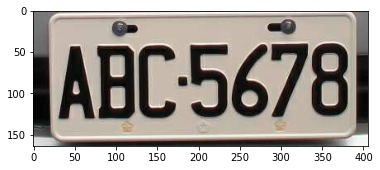

In [8]:
i1 = i[0]
x,y,w,h = cv.boundingRect(i1)
if w>2*h:
    print(1)
    plt.imshow(img[y:y+h,x:x+w])
    plt.show()
    result = img[y:y+h,x:x+w]

In [14]:
text = image_to_string(result, lang='eng') #, lang='eng'
print(text)

|ABC'5678|



8


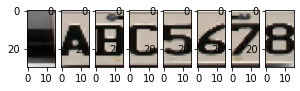

In [65]:
import cv2
from matplotlib import pyplot as plt
## 根據每行和每列的黑色和白色畫素數進行圖片分割。

# 1、讀取影像，並把影像轉換為灰度影像並顯示
img_ = cv2.imread('C:/Users/Tingchun.TC.Hung/Desktop/Record/Computer_Science/chepai/chepai2.jpg')  # 讀取圖片
img_gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)  # 轉換了灰度化
# cv2.imshow('gray', img_gray)  # 顯示圖片
# cv2.waitKey(0)

# 2、將灰度影像二值化，設定閾值是100
ret, img_thre = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
# cv2.imshow('white_black image', img_thre)  # 顯示圖片
# cv2.waitKey(0)

# 4、分割字元
white = []  # 記錄每一列的白色畫素總和
black = []  # ..........黑色.......
height = img_thre.shape[0]
width = img_thre.shape[1]
white_max = 0
black_max = 0
# 計算每一列的黑白色畫素總和
for i in range(width):
    s = 0  # 這一列白色總數
    t = 0  # 這一列黑色總數
    for j in range(height):
        if img_thre[j][i] == 255:
            s += 1
        if img_thre[j][i] == 0:
            t += 1
    white_max = max(white_max, s)
    black_max = max(black_max, t)
    white.append(s)
    black.append(t)
    # print(s)
    # print(t)

arg = False  # False表示白底黑字；True表示黑底白字
if black_max > white_max:
    arg = True

threshold_number = 0.85
    
# 分割影像
def find_end(start_):
    end_ = start_ + 1
    for m in range(start_ + 1, width - 1):
        if (black[m] if arg else white[m]) > (threshold_number * black_max if arg else threshold_number * white_max):  # 0.95這個引數請多調整，對應下面的0.05（針對畫素分佈調節）
            end_ = m
            break
    return end_

n = 1
start = 1
end = 2
word = []
while n < width - 2:
    n += 1
    if (white[n] if arg else black[n]) > ((1-threshold_number) * white_max if arg else (1-threshold_number) * black_max):
        # 上面這些判斷用來辨別是白底黑字還是黑底白字
        # 0.05這個引數請多調整，對應上面的0.95
        start = n
        end = find_end(start)
        n = end
        if end - start > 5:
            cj = img_[1:height, start:end]
            cj = cv2.resize(cj, (15, 30))
            word.append(cj)

print(len(word))
for i,j in enumerate(word):
    plt.subplot(1,10,i+1)
    plt.imshow(word[i],cmap='gray')
plt.show()

In [2]:
2**7 /3

42.666666666666664

In [3]:
1800/85

21.176470588235293